Calvin Pitney SIN:114198709

Andrew Grover SIN: 117805567

---



In [344]:
## part 1

!pip install html5lib
!pip install pandas
!pip install beautifulsoup4
!pip install requests
import pandas as pd
from bs4 import BeautifulSoup
import requests

url = 'https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares.html'
page = requests.get(url)
bs = BeautifulSoup(page.content,'html.parser')
bs.prettify()
table = bs.find('table')
df = pd.read_html(str(table))[0]
df.columns = ['rank', 'x_classification', 'date', 'region', 'start_time', 
              'maximum_time','end_time','movie']
display(df)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


,rank,x_classification,date,region,start_time,maximum_time,end_time,movie
0,1,X28+,2003/11/04,486,19:29,19:53,20:06,MovieView archive
1,2,X20+,2001/04/02,9393,21:32,21:51,22:03,MovieView archive
2,3,X17.2+,2003/10/28,486,09:51,11:10,11:24,MovieView archive
3,4,X17+,2005/09/07,808,17:17,17:40,18:03,MovieView archive
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,MovieView archive
5,6,X10,2003/10/29,486,20:37,20:49,21:01,MovieView archive
6,7,X9.4,1997/11/06,8100,11:49,11:55,12:01,MovieView archive
7,8,X9.3,2017/09/06,2673,11:53,12:02,12:10,MovieView archive
8,9,X9,2006/12/05,930,10:18,10:35,10:45,MovieView archive
9,10,X8.3,2003/11/02,486,17:03,17:25,17:39,MovieView archive


First we install required packages,
next we create a beautful soup table using the provided URL,
then we convert the table to a dataframe and rename columns.

In [345]:
## part 2

import datetime
df = df.drop(['movie'] , axis=1)

df['date'] = pd.to_datetime(df['date'] , format='%Y/%m/%d')
for i,r in df.iterrows():
    df.at[i,'start_time']= datetime.datetime.strptime(df.at[i,'start_time'] ,'%H:%M').time()
    df.at[i,'maximum_time'] = datetime.datetime.strptime(df.at[i,'maximum_time'] ,'%H:%M').time()
    df.at[i,'end_time'] = datetime.datetime.strptime(df.at[i,'end_time'] , '%H:%M').time()

for i,r in df.iterrows():
    df.at[i,'start_time']= datetime.datetime.combine(df.at[i,'date'] , df.at[i,'start_time'])
    df.at[i,'maximum_time']= datetime.datetime.combine(df.at[i,'date'] , df.at[i,'maximum_time'])
    df.at[i,'end_time']= datetime.datetime.combine(df.at[i,'date'] , df.at[i,'end_time'])


df.columns = ['rank', 'x_classification', 'date', 'region', 'start_datetime', 'max_datetime','end_datetime']
df.drop(['date'] , axis=1)
df.replace('-','NaN')

,rank,x_classification,date,region,start_datetime,max_datetime,end_datetime
0,1,X28+,2003-11-04,486,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00
1,2,X20+,2001-04-02,9393,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00
2,3,X17.2+,2003-10-28,486,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00
3,4,X17+,2005-09-07,808,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00
4,5,X14.4,2001-04-15,9415,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00
5,6,X10,2003-10-29,486,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00
6,7,X9.4,1997-11-06,8100,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00
7,8,X9.3,2017-09-06,2673,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00
8,9,X9,2006-12-05,930,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00
9,10,X8.3,2003-11-02,486,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00


First we drop the last column, then we convert date and time columns to datetimes and combine. Lastly, we rename time columns and drop date column.

In [346]:
##step 3 scrape NASA data
url2 = 'https://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html'

page2 = requests.get(url2)

bs2 = BeautifulSoup(page2.content,'html.parser')

#take data from header pre
found1 = bs2.find("pre")

out1 = ""
arr1 = []

#remove extra tags
for word in found1:
  rm = False
  for c in word:
    if c == '<':
      rm = True
    else:
      if rm and c == '>':
        rm = False
      else:
        if not rm :
          out1 = out1+c

#trim ends
out1 = out1[801:]
out1 = out1[:-99]

arr1 = out1.split()

#create dictionary for dataframe
dict1 = {'start_date':[],'start_time':[],'end_date':[], 'end_time':[],
         'start_freq':[],'end_freq':[], 'flare_loc':[], 'flare_reg':[],
         'flare_class':[], 'cme_date':[], 'cme_time':[], 'cme_angle':[],
         'cme_width': [], 'cme_speed':[]}

#iterate each word of table and fill dictionary
counter = 0
for x in arr1:
  if counter == 0 and len(x) > 6 and len(x) > 3 and x[4] == '/' and x[7] == '/':
    dict1['start_date'].append(x)
    counter+=1
  else:
    if counter == 0:
      continue
    else:
      if counter == 1:
        dict1['start_time'].append(x)
        counter+=1
      else:
        if counter == 2:
          dict1['end_date'].append(x)
          counter+=1
        else:
          if counter == 3:
            dict1['end_time'].append(x)
            counter+=1
          else:
            if counter == 4:
              dict1['start_freq'].append(x)
              counter+=1
            else:
              if counter == 5:
                dict1['end_freq'].append(x)
                counter+=1
              else:
                if counter == 6:
                  dict1['flare_loc'].append(x)
                  counter+=1
                else:
                  if counter == 7:
                    dict1['flare_reg'].append(x)
                    counter+=1
                  else:
                    if counter == 8:
                      dict1['flare_class'].append(x)
                      counter+=1
                    else:
                      if counter == 9:
                        dict1['cme_date'].append(x)
                        counter+=1
                      else:
                        if counter == 10:
                          dict1['cme_time'].append(x)
                          counter+=1
                        else:
                          if counter == 11:
                            dict1['cme_angle'].append(x)
                            counter+=1
                          else:
                            if counter == 12:
                              dict1['cme_width'].append(x)
                              counter+=1
                            else:
                              if counter == 13:
                                dict1['cme_speed'].append(x)
                                counter =0
#put dictionary in dataframe
df2 = pd.DataFrame.from_dict(dict1)
display(df2)

,start_date,start_time,end_date,end_time,start_freq,end_freq,flare_loc,flare_reg,flare_class,cme_date,cme_time,cme_angle,cme_width,cme_speed
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,2017/09/17,11:45,09/17,12:35,16000,900,S08E170,-----,----,09/17,12:00,Halo,360,1385
518,2017/10/18,05:48,10/18,12:40,16000,400,S06E123,-----,----,10/18,08:00,85,146,1001
519,2019/05/03,23:52,05/04,00:16,13000,2300,N12E82,12740,C1.0,05/03,23:24,90,113,692
520,2020/11/29,13:07,11/29,15:23,14000,850,S23E89,-----,M4.4,11/29,13:25,Halo,360,2077


This code first uses a html request, and beautifulsoup to find the section tag 'pre' which has all the data.

Next we loop through that string to remove all of the other tags from the html file, links ect., and trim the begining and end so its just data.

Next we split the data into an array, and add each of those values to a dictionary, so that the data can be used column-wise.

Finally we load the dictionary into a pandas dataframe.

In [347]:
#step 4 tidy NASA data

import numpy as np
from datetime import datetime

#replacing meaningless values with nan
df2.replace(to_replace='????', value= np.NaN, inplace = True)
df2.replace(to_replace='-----', value= np.NaN, inplace = True)
df2.replace(to_replace='----', value= np.NaN, inplace = True)
df2.replace(to_replace='---', value= np.NaN, inplace = True)
df2.replace(to_replace='--:--', value= np.NaN, inplace = True)
df2.replace(to_replace='--/--', value= np.NaN, inplace = True)

#get is_halo list and fix cme_angle
l1 = []

for x in df2['cme_angle']:
  l1.append(x == 'Halo')

df2.replace(to_replace='Halo', value= 'NA', inplace = True)

df2['is_halo'] = l1

#get width_lower_bound and fix cme_angle
l2 = []
l3 = []
zs = ''
for z in df2['cme_width']:
  zs = str(z)
  if zs[0] == '>':
    l2.append(True)
    l3.append(zs[1:])
  else:
    l2.append(False)
    if len(zs) > 3 and zs[3] == 'h':
      l3.append(zs[:-1])
    else:
      l3.append(zs)


df2['width_lower_bound'] = l2

df2['cme_angle'] = l3

#aggregate and fix start and end datetimes
l4 = []
l5 = []
l6 = []

for x in df2['start_date']:
  l4.append(x)
for x in df2['start_time']:
  l5.append(x)

for i in range(len(l4)):
  l6.append(datetime.strptime((l4[i] + ' ' + l5[i]), '%Y/%m/%d %H:%M'))

df2.insert(0, 'start_datetime', l6, True)

l5 = []
l6 = []
l7 = []

for x in range(len(df2['end_date'])):
  l5.append(l4[x][:-5] + df2['end_date'][x])
for x in df2['end_time']:
  l6.append(x)

strng = ''  
for i in range(len(l4)):
  if(l6[i] == '24:00'):
    strng = (l5[i] + ' ' + '23:59')
  else:
    strng = (l5[i] + ' ' + l6[i])
  l7.append(datetime.strptime(strng, '%Y/%m/%d %H:%M'))

df2.insert(1, 'end_datetime', l7, True)

#remove old dates and times
df2.drop('start_date', axis= 1, inplace= True)
df2.drop('start_time', axis= 1, inplace= True)
df2.drop('end_date', axis= 1, inplace= True)
df2.drop('end_time', axis= 1, inplace= True)

df7 = df2.copy()
display(df2)

,start_datetime,end_datetime,start_freq,end_freq,flare_loc,flare_reg,flare_class,cme_date,cme_time,cme_angle,cme_width,cme_speed,is_halo,width_lower_bound
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,04/01,15:18,79,79,312,False,False
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,04/07,14:27,360,360,878,True,False
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,05/12,05:30,360,360,464,True,False
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,05/21,21:00,165,165,296,False,False
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,09/23,22:02,155,155,712,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,2017-09-17 11:45:00,2017-09-17 12:35:00,16000,900,S08E170,NaN,NaN,09/17,12:00,360,360,1385,True,False
518,2017-10-18 05:48:00,2017-10-18 12:40:00,16000,400,S06E123,NaN,NaN,10/18,08:00,146,146,1001,False,False
519,2019-05-03 23:52:00,2019-05-04 00:16:00,13000,2300,N12E82,12740,C1.0,05/03,23:24,113,113,692,False,False
520,2020-11-29 13:07:00,2020-11-29 15:23:00,14000,850,S23E89,NaN,M4.4,11/29,13:25,360,360,2077,True,False


In this step we first replace emtpy data string with NaN using replace()

Next we gather data for is_Halo and add that to the dataframe, while replacing Halo values with NaN in cme_angle.

Next the cme_width is extracted (bad chars removed) and if it was bounded the is_lowerBound column is built to reflect this.

Finally we combine the start dates and times, as well as end dates and times and remove the old columns.






In [348]:
## part 2 question 1

data = []
rowList = []

#get catagory x flare rows
for i,r in df2.iterrows():
  ## Locate row with X
  if str((df2['flare_class'])[i])[0] == 'X':
    data.append((float( df2.at[i,'flare_class'][1:] ), i))

#sort those entries strongest first
list.sort(data, reverse= True)
for k,v in data:
  rowList.append(v)

rowList = rowList[:50]

df3 = df2.iloc[rowList].copy()
df6 = df3.copy()

#drop/sort columns fix indexes to match the other datatable
df3.drop(columns=['start_freq', 'end_freq', 'flare_loc', 'cme_date', 
                  'cme_angle', 'cme_width', 'cme_speed', 'is_halo', 
                  'width_lower_bound'], inplace= True)

df3.reset_index(inplace=True)

col = df3.pop('index')
col = df3.pop('flare_class')
df3.insert(0,'flare_class', col)
col = df3.pop('start_datetime')
df3.insert(1, 'start_datetime', col)
col = df3.pop('flare_reg')
df3.insert(2, 'Region', col)
col = df3.pop('cme_time')
df3.insert(3, 'Maximum', col)


display(df3)



,flare_class,start_datetime,Region,Maximum,end_datetime
0,X28.,2003-11-04 20:00:00,10486,19:54,2003-11-04 23:59:00
1,X20.,2001-04-02 22:05:00,9393,22:06,2001-04-03 02:30:00
2,X17.,2003-10-28 11:10:00,10486,11:30,2003-10-29 23:59:00
3,X14.,2001-04-15 14:05:00,9415,14:06,2001-04-16 13:00:00
4,X10.,2003-10-29 20:55:00,10486,20:54,2003-10-29 23:59:00
5,X9.4,1997-11-06 12:20:00,8100,12:10,1997-11-07 08:30:00
6,X9.3,2017-09-06 12:05:00,12673,12:24,2017-09-07 08:00:00
7,X9.0,2006-12-05 10:50:00,10930,NaN,2006-12-05 20:00:00
8,X8.3,2017-09-10 16:02:00,NaN,16:00,2017-09-11 06:50:00
9,X8.3,2003-11-02 17:30:00,10486,17:30,2003-11-03 01:00:00


We cannot replicate the same top 50 flares as spaceweatherlive.com with the data obtained from NASA. While most of the entries are the same, spaceweatherlive appears to have more flares in their dataset. The first missing flare from our list compared to theirs is number 4, by the time we get to number 50 we are missing about 15 flares. It also appears some of the data has slightly different values for the CME time and the magnitude.

In [349]:
## part 2 question 2

# defined match function, takes in a row index and data frame
def match (df_, row_index) :

	for i,r in df.iterrows() :
		# Record index with same start date
		if df['start_datetime'][i] == df_['start_datetime'][row_index] :
			return i
		
	return -1

newCol = [];


for i,r in df2.iterrows() : 
	newCol.append( match(df2 , i) )

# Add new column
add = pd.DataFrame({ 'rank': newCol})

df2.join(add)



,start_datetime,end_datetime,start_freq,end_freq,flare_loc,flare_reg,flare_class,cme_date,cme_time,cme_angle,cme_width,cme_speed,is_halo,width_lower_bound,rank
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,04/01,15:18,79,79,312,False,False,-1
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,04/07,14:27,360,360,878,True,False,-1
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,05/12,05:30,360,360,464,True,False,-1
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,05/21,21:00,165,165,296,False,False,-1
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,09/23,22:02,155,155,712,False,False,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,2017-09-17 11:45:00,2017-09-17 12:35:00,16000,900,S08E170,NaN,NaN,09/17,12:00,360,360,1385,True,False,-1
518,2017-10-18 05:48:00,2017-10-18 12:40:00,16000,400,S06E123,NaN,NaN,10/18,08:00,146,146,1001,False,False,-1
519,2019-05-03 23:52:00,2019-05-04 00:16:00,13000,2300,N12E82,12740,C1.0,05/03,23:24,113,113,692,False,False,-1
520,2020-11-29 13:07:00,2020-11-29 15:23:00,14000,850,S23E89,NaN,M4.4,11/29,13:25,360,360,2077,True,False,-1


In our function match(), we are defining the best match to be solar flares that went off on the same dates. If a row does not match then its rank according to SpaceWeatherLive is -1



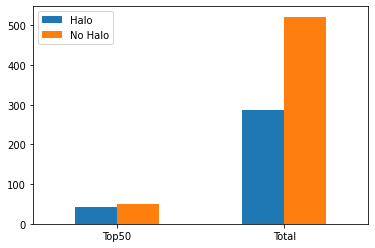

In [350]:
## part 2 question 3

#counting halos in top 50
halocount1 = 0
total1 = 0
for x in df6['is_halo']:
  if x:
    halocount1 +=1
  total1 += 1

#counting halos in total list
halocount2 = 0
total2 = 0
for x in df7['is_halo']:
  if x:
    halocount2 +=1
  total2 += 1

#creating barplot
df8 = pd.DataFrame({'x':['Top50', 'Total'],
                    'Halo':[halocount1, halocount2], 'No Halo':[total1,total2]},
                    index= ['Top50', 'Total'])
ax = df8.plot.bar(rot=0)


Flares in the top 50 definitly tend to have Halo CMEs. Over 80% in the top 50 have Halo CMEs, while close to half in the entire list have Halo CMEs. We can conclude that stronder flares are more likely to have Halo CMEs.